In [1]:
import numpy as np
import pandas as pd
import warnings
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [2]:
warnings.filterwarnings("ignore")

<span style="font-family: 'Trebuchet MS', sans-serif;">

# Primeiros passos
</span>

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## DataBase
</span>

In [3]:
df = pd.read_csv(
    '../data/mall/Mall_Customers.csv',
    sep = ',', encoding = 'iso-8859-1'
)

In [4]:
df.shape

(2000, 5)

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## Atributos do DataFrame

- **CustomerID:** identificação do cliente.

- **Genre:** Gênero.

- **Age:** Idade.

- **Annual Income (k$):**	Rendimento anual.

- **Spending Score (1 a 100):** Pontuação de gastos.

</span>

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Análise Gráfica dos atributos
</span>

**Idade**

In [6]:
colors = px.colors.qualitative.Dark24_r
hist = px.histogram(
    df, x='Age', nbins=60, 
    labels={'Age': 'Idade', 'count': 'Número de Pessoas'},
    title='Distribuição das Idades',
    color_discrete_sequence=[colors[0]]
)
hist.update_layout(
    width=600, height=400, 
    xaxis_title='Idade',
    yaxis_title='Número de Pessoas',
    title_x=0.5, 
    margin=dict(l=50, r=50, t=50, b=50),
)
hist.show()

**Gênero**

In [7]:
df['Genre'].value_counts()

Genre
Female    1115
Male       885
Name: count, dtype: int64

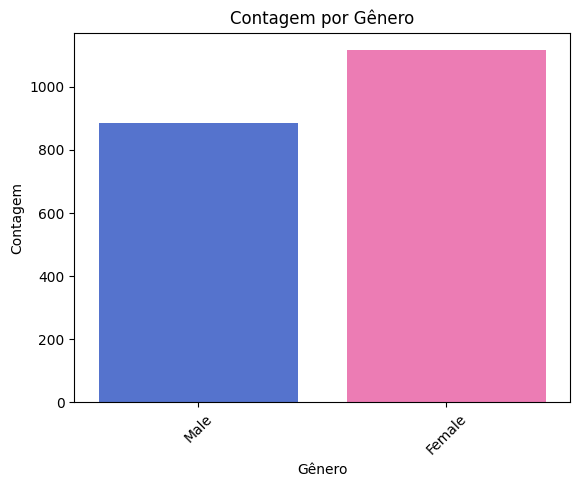

In [8]:
colors = {'Female': 'hotpink', 'Male': 'royalblue'}
sns.countplot(x='Genre', data=df, palette=colors)
plt.title('Contagem por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

plt.show()

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## Exploração e tratamento dos dados

</span>

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Alterando nomes das colunas
</span>

In [9]:
df.rename(
    columns = {'CustomerID': 'ID'},
    inplace = True
)
df.rename(
    columns = {'Genre': 'genero'},
    inplace = True
)
df.rename(
    columns = {'Age': 'idade'},
    inplace = True
)
df.rename(
    columns = {'Annual Income (k$)': 'rendimento'},
    inplace = True
)
df.rename(
    columns = {'Spending Score (1-100)': 'pontuacao'},
    inplace = True
)

In [10]:
df.head(3)

,ID,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Análises

</span>

**Valores Missing**

In [11]:
df.isnull().sum()

ID            0
genero        0
idade         0
rendimento    0
pontuacao     0
dtype: int64

**Tipos de atributos**

In [12]:
df.dtypes

ID             int64
genero        object
idade          int64
rendimento     int64
pontuacao      int64
dtype: object

**Dados Estatísticos**

In [13]:
df.describe()

,ID,idade,rendimento,pontuacao
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,600.495000,35.170000,74.71650,29.722500
std,305.580406,10.520097,33.21942,25.109535
min,1.000000,18.000000,13.00000,1.000000
25%,350.750000,26.000000,46.00000,10.000000
50%,600.500000,35.000000,75.00000,11.000000
75%,850.250000,44.000000,100.00000,50.000000
max,1200.000000,70.000000,146.00000,99.000000


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Análise dos Outliers
</span>

**Rendimento**

In [14]:
boxplot = px.box(
    df, y = "rendimento"
)
boxplot.update_layout(
    width=600,  
    height=400,
)
boxplot.show()

**Idade**

In [15]:
boxplot = px.box(
    df, y = "idade"
)
boxplot.update_layout(
    width=600,  
    height=400,
)
boxplot.show()

**Pontuação**

In [16]:
boxplot = px.box(
    df, y = "pontuacao"
)
boxplot.update_layout(
    width=600,  
    height=400,
)
boxplot.show()

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## Pré-processamento
</span>

**Exluir identificação do cliente**

In [17]:
df_att = df.drop(labels = 'ID', axis = 1)

In [18]:
df_att.head(2)

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

#### Transformando variáveis categóricas em numéricas (encoder manual)
</span>

In [19]:
df_att['genero'].replace({
    'Female': 0,
    'Male': 1
}, inplace = True)

In [20]:
df_att.head(3)

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Escalonamento
</span>

In [21]:
scale = StandardScaler()

In [22]:
df_esc = scale.fit_transform(df_att)

In [23]:
df_esc

array([[ 1.12244688, -1.53744251, -1.7980878 ,  0.36957356],
       [ 1.12244688, -1.34728265, -1.7980878 ,  2.04266326],
       [-0.89091075, -1.44236258, -1.7679774 , -0.94499691],
       ...,
       [-0.89091075, -0.49156325,  1.6947188 , -0.74581957],
       [ 1.12244688, -1.15712278,  1.7248292 , -0.86532597],
       [-0.89091075, -1.06204285,  1.7549396 , -0.82549051]])

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif; font-weight: 100;">

# DBSCAN
O DBSCAN é um algoritmo de clustering que agrupa pontos de dados com base na densidade local. Ele é capaz de identificar clusters de formas arbitrárias e é robusto em relação ao ruído.
</br> </br>
<img src="https://miro.medium.com/v2/resize:fit:786/0*ESUGzHIE5wvrtgYs.png" alt="Descrição da imagem" width="450">
</br>

O DBSCAN tem dois parâmetros principais:

- **Eps (Epsilon)**: 
    - A distância máxima entre dois pontos para que sejam considerados vizinhos.
- **MinPts (Pontos Mínimos)**: 
    - O número mínimo de pontos dentro da distância epsilon para formar um cluster.

**O algoritmo funciona da seguinte forma:**

1. Começa com um ponto de dados **aleatório** que ainda não foi visitado.

2. Recupera todos os seus vizinhos dentro da **distância epsilon**.

3. Se o número de vizinhos for maior ou igual a **MinPts**, um novo cluster é formado.

4. Expandir o cluster para incluir todos os pontos vizinhos alcançáveis.

5. Repetir o processo para todos os pontos de dados do conjunto até que todos sejam visitados.

</br>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db6-e1584577503359.png" alt="Descrição da imagem" width="400">
</br>

</span>

<span style="font-family: 'Trebuchet MS', sans-serif;">

## DBSCAN com PCA
</span>

In [24]:
pca = PCA(n_components = 2)

In [25]:
df_pca = pca.fit_transform(df_esc)

In [26]:
df_pca

array([[ 0.96133162, -0.38699117],
       [ 1.85106946,  0.41701816],
       [ 1.30154662, -1.46566991],
       ...,
       [-0.82746028, -1.35862001],
       [-1.88385317, -1.32332653],
       [-0.79236934, -1.87993492]])

In [27]:
dbscan = DBSCAN(eps = 0.165, min_samples = 10)
dbscan.fit(df_pca);

In [28]:
classificacao_pca = dbscan.labels_
classificacao_pca

array([ 0, -1, -1, ...,  6, 24, 20], dtype=int64)

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Gráfico de dispersão
</span>

In [29]:
graf = px.scatter(x = df_pca[:, 0], y = df_pca[:, 1], color = classificacao_pca)
graf.update_layout(width = 700, height = 400, title_text = 'Agrupamento DBSCAN')
graf.show()

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Agrupamento
</span>

In [30]:
agrupamento_pca = pd.DataFrame(classificacao_pca, columns = ['Grupo'])
agrupamento_pca

,Grupo
0,0
1,-1
2,-1
3,-1
4,0
...,...
1995,22
1996,23
1997,6
1998,24


In [31]:
df_pca2 = pd.concat([df, agrupamento_pca], axis = 1)
df_pca2

,ID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,0
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
1995,1196,Female,28,129,9,22
1996,1197,Male,29,130,10,23
1997,1198,Female,30,131,11,6
1998,1199,Male,23,132,8,24


In [32]:
ruido_pca = df_pca2.loc[df_pca2.Grupo == -1]
ruido_pca

,ID,genero,idade,rendimento,pontuacao,Grupo
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,-1
7,8,Female,23,18,94,-1
8,9,Male,64,19,3,-1
...,...,...,...,...,...,...
1774,975,Male,43,116,10,-1
1777,978,Male,43,117,10,-1
1779,980,Male,43,117,10,-1
1787,988,Male,41,118,10,-1


<span style="font-family: 'Trebuchet MS', sans-serif;">

## DBSCAN com todos os atributos
</span>

In [45]:
dbscan_all = DBSCAN(eps = 0.45, min_samples = 8)
dbscan_all.fit(df_esc);

In [46]:
classificacao_all = dbscan_all.labels_
classificacao_all

array([-1, -1, -1, ...,  7,  6,  7], dtype=int64)

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Agrupamento
</span>

In [47]:
agrupamento_all = pd.DataFrame(classificacao_all, columns = ['Grupo'])
agrupamento_all

,Grupo
0,-1
1,-1
2,-1
3,0
4,-1
...,...
1995,7
1996,6
1997,7
1998,6
